<a href="https://colab.research.google.com/github/sangwanaakanksha/causal-inference/blob/main/wfh_rct_causal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
pd.set_option('display.max_columns', None)

### Fixed Effects

Fixed effects are taken from tc_comparison

In [ ]:
tc_comparison=pd.read_stata('gdrive/MyDrive/Summer 2024/DSO 585/tc_comparison.dta')

In [ ]:
tc_comparison.head()

,personid,prior_experience,age,tenure,basewage,bonus,grosswage,ageyoungestchild,costofcommute,children,rental,bedroom,expgroup,men,married,second_technical,high_school,tertiary_technical,university,internet,type
0,33278,0.0,20.0,22.0,1450.000000,594.222229,2275.408936,0,12.0,no,no,yes,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,phone call group
1,44800,5.0,25.0,2.0,1500.000000,587.599976,2742.290039,0,12.0,no,no,yes,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,phone call group
2,32320,0.0,22.0,23.0,1600.000000,2272.000000,4578.473145,0,4.0,no,yes,yes,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,phone call group
3,42152,48.0,25.0,5.0,1411.111084,624.444458,2279.654541,0,20.0,no,no,yes,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,phone call group
4,42096,0.0,23.0,5.0,1411.111084,405.888885,1933.832275,0,8.0,no,no,yes,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,phone call group


#### Column Glossary

- personid: unique identifier
- prior_experience: prior relevant work experiencce (months)
- age: self explanatory (years)
- tenure: tenure in the company (months)
- basewage: monthly base wage of each employee, in yuan
- bonus: average individual monthly bonus in yuan
- grosswage: total monthly individual take home pay in yuan
- ageyoungestchild: the age of youngest child (years)
- costofcommute: cost of commuting from home to office, viceversa (yuan)
- children: binary variable.  1 means having children.
- rental: home ownership status. 1 means rental.
- bedroom: does the employee has his/her own bedroom. 1 means yes.
- expgroup: whether in treatment group. 1 means yes.
- men: gender. 1 means man.
- married: marriage status. 1 means yes.
- second_technical: binary for attending secondary technical school.
- high_school: binary for attending high school.
- tertiary_technical: binary for attending tertiary technical school.
- university: binary for attending university.
- internet: status of internet access. 1 means having internet.
- type: type of work
  - phone call group. KPI: phone calls answered (airfare), orders taken (hotel)
  - notification group (airfare). KPI: Notifications sent.
  - pre-order group (hotel). KPI: Reservation phone calls made.
  - post-order group (hotel). KPI: Orders corrected.
  - night shift (hotel). KPI: Reservation phone calls made and orders corrected.

In [ ]:
tc_comparison.describe().T

,count,mean,std,min,25%,50%,75%,max
personid,249.0,29619.550201,11844.937433,3906.000000,19470.000000,31936.000000,39748.000000,45442.000000
prior_experience,249.0,17.915216,25.881529,0.000000,0.000000,6.000000,26.000000,180.000000
age,249.0,24.393574,3.545459,18.000000,22.000000,24.000000,26.000000,35.000000
tenure,249.0,27.140562,21.921743,2.000000,9.000000,23.000000,44.000000,96.000000
basewage,249.0,1550.733032,161.448044,1155.555542,1450.000000,1550.000000,1616.666626,2566.666748
bonus,249.0,1060.133789,625.333557,123.199997,620.666687,909.333313,1294.000000,3965.888916
grosswage,249.0,2975.145752,789.626953,1387.589966,2403.451172,2786.255615,3485.458740,6220.745605
ageyoungestchild,249.0,0.614458,1.929177,0.000000,0.000000,0.000000,0.000000,13.000000
costofcommute,249.0,8.103140,6.958090,0.000000,4.000000,8.000000,10.000000,55.000000
expgroup,249.0,0.526104,0.500324,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
tc_comparison['expgroup'].unique()

array([0, 1], dtype=int8)

In [ ]:
# prompt: group by based on column 'type'  and  'expgroup' with .count()

tc_comparison.groupby(['type','expgroup'])['personid'].count()


type                          expgroup
phone call group              0           66
                              1           68
notification group (airfare)  0           20
                              1           23
pre-order group (hotel)       0           12
                              1           13
post-order group (hotel)      0           17
                              1           19
night shift (hotel)           0            3
                              1            8
Name: personid, dtype: int64

In [ ]:
tc_comparison.groupby(['expgroup'])['personid'].count()

expgroup
0    118
1    131
Name: personid, dtype: int64

In [ ]:
tc_comparison.groupby(['type'])['personid'].count()


type
phone call group                134
notification group (airfare)     43
pre-order group (hotel)          25
post-order group (hotel)         36
night shift (hotel)              11
Name: personid, dtype: int64

### Employee Performance

Taken from performance_during_exper.dta

In [ ]:
df_performance_experiment=pd.read_stata('gdrive/MyDrive/Summer 2024/DSO 585/performance_during_exper.dta') #update path

In [ ]:
df_performance_experiment.head()

,personid,year_week,expgroup,perform1,phonecall,phonecallraw,treatment,experiment_treatment,experiment_control,experiment_nantong,homethatweek,experiment_home,logphonecall,logcallpersec,logcalllength,logcall_dayworked,logdaysworked,wage_month,experiment_treatment_commute120,date
0,28560,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01
1,26906,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01
2,31888,201001.0,0.0,-2.248854,-2.287922,109.0,0.0,0.0,0.0,0.0,0.0,0.0,4.691348,-5.144450,9.835797,9.835797,0.000000,201001.0,0.0,2010-01-01
3,16424,201001.0,0.0,-1.629726,-1.283035,252.0,0.0,0.0,0.0,0.0,0.0,0.0,5.529429,-5.027789,10.557218,9.458606,1.098612,201001.0,0.0,2010-01-01
4,6364,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01


In [ ]:
#Check if personid in df_performance_experiment == personid in fixed effects
len(df_performance_experiment['personid'].unique())==len(tc_comparison['personid'].unique())

False

In [ ]:
#Filtering dataset df_performance
df_performance_experiment_cln=df_performance_experiment[df_performance_experiment['personid'].isin(tc_comparison['personid'])]

In [ ]:
#Check if personid in df_performance_experiment_cln == personid in fixed effects
len(df_performance_experiment_cln['personid'].unique())==len(tc_comparison['personid'].unique())

True

In [ ]:
len(df_performance_experiment_cln[df_performance_experiment_cln['treatment']==1]['personid'].unique())

131

In [ ]:
len(df_performance_experiment_cln)

18751

In [ ]:
#Check if the number of observations of each personid is the same
df_performance_experiment_cln.groupby('personid')['year_week'].count()

personid
3906     64
4122     86
4448     83
4942     84
5018     57
         ..
44794    31
44800    60
45238    56
45254    58
45442    59
Name: year_week, Length: 249, dtype: int64

<Axes: >

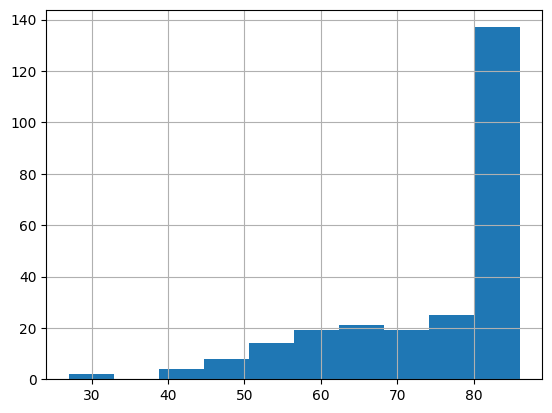

In [ ]:
#Check if the number of observations of each personid is the same and create a histogram
df_performance_experiment_cln.groupby('personid')['year_week'].count().hist()

In [ ]:
#is 'experiment_treatment' a dummy variable for treatment period?
df_performance_experiment_cln[df_performance_experiment_cln['treatment']==1]['year_week'].min()

201001.0

In [ ]:
df_performance_experiment_cln[df_performance_experiment_cln['experiment_treatment']==0]['year_week'].max()

201133.0

In [ ]:
#adding new column to indicate experiment start and end
df_performance_experiment_cln['experiment_time']=[1 if i>=201050 else 0 for i in df_performance_experiment_cln['year_week']]

<ipython-input-59-eaf1c64fcfbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_performance_experiment_cln['experiment_time']=[1 if i>=201050 else 0 for i in df_performance_experiment_cln['year_week']]


In [ ]:
#check if experiment_time is correct
df_performance_experiment_cln.groupby('experiment_time')['year_week'].count()

experiment_time
0    11261
1     7490
Name: year_week, dtype: int64

In [ ]:
#drop experiment_nantong
df_performance_experiment_cln=df_performance_experiment_cln.drop(columns=['experiment_nantong'])

In [ ]:
df_performance_experiment_cln.describe().T

,count,mean,min,25%,50%,75%,max,std
personid,18751.0,29375.514159,3906.0,19470.0,31292.0,39502.0,45442.0,11670.252191
year_week,18751.0,201058.59375,201001.0,201022.0,201042.0,201109.0,201133.0,44.466728
expgroup,18751.0,0.541891,0.0,0.0,1.0,1.0,1.0,0.498255
perform1,18044.0,-0.041261,-3.030936,-0.733773,-0.029416,0.605351,4.839325,1.001894
phonecall,9736.0,-0.008282,-3.11322,-0.542947,0.06621,0.605231,5.828471,0.964127
phonecallraw,9589.0,440.213898,1.0,357.0,445.0,527.0,1264.0,142.528061
treatment,18751.0,0.541891,0.0,0.0,1.0,1.0,1.0,0.498255
experiment_treatment,18751.0,0.224948,0.0,0.0,0.0,0.0,1.0,0.417559
experiment_control,18751.0,0.174497,0.0,0.0,0.0,0.0,1.0,0.379547
homethatweek,18751.0,0.204202,0.0,0.0,0.0,0.0,1.0,0.403128


In [ ]:
df_performance_experiment_cln[df_performance_experiment_cln['experiment_home']==1]['year_week'].min()

201050.0

In [ ]:
df_performance_experiment_cln

,personid,year_week,expgroup,perform1,phonecall,phonecallraw,treatment,experiment_treatment,experiment_control,homethatweek,experiment_home,logphonecall,logcallpersec,logcalllength,logcall_dayworked,logdaysworked,wage_month,experiment_treatment_commute120,date,experiment_time
0,28560,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
1,26906,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
2,31888,201001.0,0.0,-2.248854,-2.287922,109.0,0.0,0.0,0.0,0.0,0.0,4.691348,-5.144450,9.835797,9.835797,0.000000,201001.0,0.0,2010-01-01,0
3,16424,201001.0,0.0,-1.629726,-1.283035,252.0,0.0,0.0,0.0,0.0,0.0,5.529429,-5.027789,10.557218,9.458606,1.098612,201001.0,0.0,2010-01-01,0
4,6364,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111472,36032,201133.0,1.0,0.446691,0.208769,449.0,1.0,1.0,0.0,1.0,1.0,6.107023,-5.074951,11.181974,9.572536,1.609438,201108.0,0.0,2011-08-15,1
111473,43286,201133.0,1.0,-0.071992,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.791759,201108.0,0.0,2011-08-15,1
111474,13530,201133.0,1.0,-0.025786,NaN,NaN,1.0,1.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,1.791759,201108.0,0.0,2011-08-15,1
111475,23228,201133.0,1.0,1.819166,1.214984,585.0,1.0,1.0,0.0,1.0,1.0,6.371612,-5.273263,11.644875,10.035437,1.609438,201108.0,0.0,2011-08-15,1


##### Dataset Glossary

- personid: uniqueid
- expgroup: whether in treatment group. 1 means yes.
- perform1: Performance z-score.
- phonecall: measure of phonecall
- treatment: whether in treatment group. 1 means yes.
- experiment_treatment: whether in treatment group. 1 means yes.
- experiment_control: whether in control group. 1 means yes.
- homethatweek: is the subject working from home. 1 means yes.
- experiment_home: is the subject working from home during the experiment. 1 means yes.
- logphonecall: log of phone calls
- logcallpersec: log of phonecall per second
- logcalllength: log of call length
- logcall_dayworked: not sure
- logdaysworked: measure of days worked logged.
- monthly wage: monthly wage of each subject
- experiment_treatment_commute120: is the subject total commuting time >120 mins. 1 means yes.
- date: date.
- experiment_time: is the period during the experiment. 1 means yes.

KPI:
- phone call group. KPI: phone calls answered (airfare), orders taken (hotel)
- notification group (airfare). KPI: Notifications sent.
- pre-order group (hotel). KPI: Reservation phone calls made.
- post-order group (hotel). KPI: Orders corrected.
- night shift (hotel). KPI: Reservation phone calls made and orders corrected.

In an ideal world, each groups need to be assessed differently. However, due to lack of understanding in the columns listed above, a panel data regression with perform1 as the dependent variable is done.

In [ ]:
# prompt: Show data with perform1 is null from df_performance_experiment_cln

df_performance_experiment_cln[df_performance_experiment_cln['perform1'].isna()]


,personid,year_week,expgroup,perform1,phonecall,phonecallraw,treatment,experiment_treatment,experiment_control,homethatweek,experiment_home,logphonecall,logcallpersec,logcalllength,logcall_dayworked,logdaysworked,wage_month,experiment_treatment_commute120,date,experiment_time
0,28560,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
1,26906,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
4,6364,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01,0
7,29996,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01,0
19,38036,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109404,36908,201131.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,-4.605170,4.605170,2.995732,1.609438,201107.0,0.0,2011-08-01,1
110331,32320,201132.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,1.791759,201107.0,0.0,2011-08-08,1
110395,36908,201132.0,1.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,NaN,-4.795791,4.795791,3.186353,1.609438,201107.0,0.0,2011-08-08,1
111356,32320,201133.0,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,1.791759,201108.0,0.0,2011-08-15,1


In [ ]:
#Generating OLS regression
import statsmodels.api as smf

In [ ]:
#Regression pre and during experiment
model = smf.formula.ols(formula='perform1 ~ treatment:experiment_time + C(personid) + C(year_week)', data=df_performance_experiment_cln)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     35.57
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:33:41   Log-Likelihood:                -21005.
No. Observations:               18044   AIC:                         4.268e+04
Df Residuals:                   17709   BIC:                         4.529e+04
Df Model:                         334                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
print(f"{len(results.params)=}")

len(results.params)=335


In [ ]:
#Regression during experiment
model = smf.formula.ols(formula='perform1 ~ treatment + C(year_week)',
                        data=df_performance_experiment_cln[df_performance_experiment_cln['experiment_time']==1])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               perform1   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     14.36
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           2.32e-85
Time:                        23:33:42   Log-Likelihood:                -10351.
No. Observations:                7464   AIC:                         2.078e+04
Df Residuals:                    7426   BIC:                         2.104e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [ ]:
print(f"{len(results.params)=}")

len(results.params)=38


In [ ]:
len(df_performance_experiment_cln[df_performance_experiment_cln['phonecall'].isna()==False]['personid'].unique())

135

In [ ]:
#OLS Regression with phone calls pre and during experiment z-score as dependent variable
model = smf.formula.ols(formula='logphonecall ~ treatment:experiment_time + C(personid) + C(year_week)',
                        data=df_performance_experiment_cln[df_performance_experiment_cln['logphonecall'].isna()==False])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           logphonecall   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     14.67
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:33:43   Log-Likelihood:                -5173.5
No. Observations:                9589   AIC:                         1.079e+04
Df Residuals:                    9368   BIC:                         1.237e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [ ]:
print(f"{len(results.params)=}")

len(results.params)=221


In [ ]:
#OLS Regression with phone calls pre and during experiment log as dependent variable
model = smf.formula.ols(formula='phonecall ~ treatment:experiment_time + C(personid) + C(year_week)',
                        data=df_performance_experiment_cln[df_performance_experiment_cln['phonecall'].isna()==False])
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              phonecall   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     23.09
Date:                Mon, 01 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:33:45   Log-Likelihood:                -11376.
No. Observations:                9736   AIC:                         2.319e+04
Df Residuals:                    9515   BIC:                         2.478e+04
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

#### Differences in result with paper
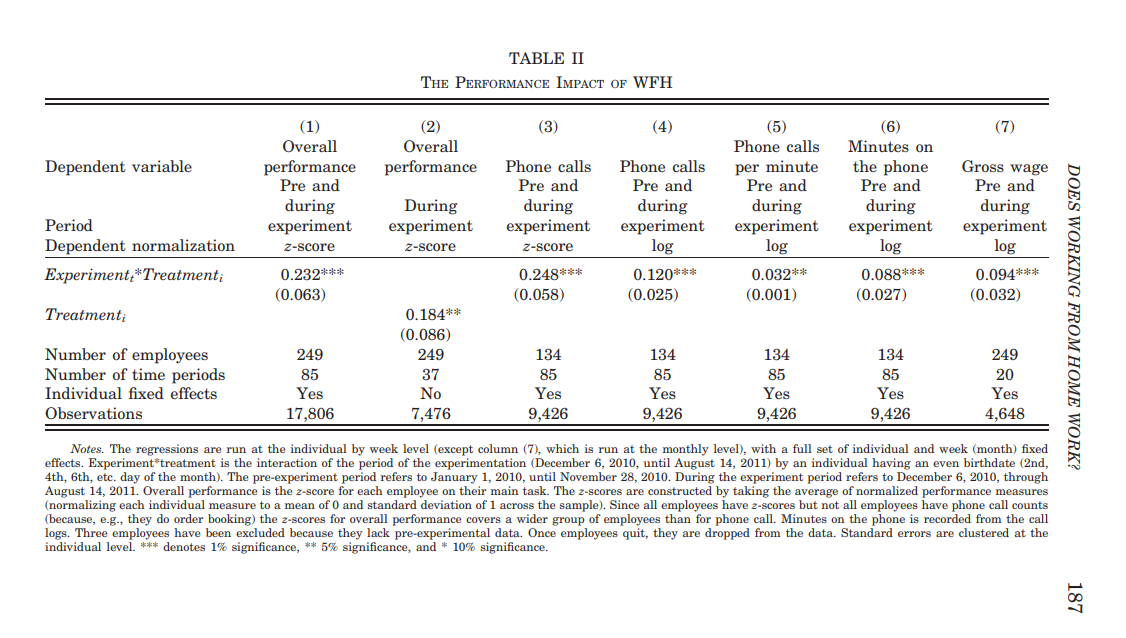

$\text{Employee Performance}_{i,t}=\alpha\text{Treat}_i*\text{Experiment}_t+\beta_t+\gamma_i+\epsilon_{i,t}$

- Overall Performance pre and during experiment z-scores:
$α_{\text{my result}}=0.2368, α_{\text{paper result}}=0.232$
 - Possible explanation to change: the paper result excluded three subjects  due to lack of pre-experiment data and one subject quitted.
- Overall Performance during experiment z-scores:
$α_{\text{my result}}=0.1837, α_{\text{paper result}}=0.184$

Interpretation: Controlling for individual fixed effects and time fixed effects, performance z-score of subjects that were working from home for 4 days is higher by 0.2368 points compared to performance z-score of working from office for the whole week.

### DiD Method

#### According to Applied Causal Inference Powered by ML and AI

The basic DiD
structure relies on having two groups of observations – a
treatment group and a control group – for two time periods –
a pre-treatment and a post-treatment period. Canonical DiD
analysis then proceeds by comparing changes in the average
pre- and post-treatment outcomes in the treatment group to
changes in the average pre- and post-treatment outcomes in
the control group.

Attaching a causal interpretation to this
comparison relies on an assumption that imposes that changes
in the treatment group in the absence of treatment would have
been the same as changes in the control group. This assumption
captures the intuition that the treatment group would have
evolved along the same path as the control group in the absence
of treatment – i.e., the two groups share "parallel trends."


The canonical DiD structure relies on existence of two time
periods, denoted 𝑡 = 1 and 𝑡 = 2, and maintains that all
observations are in the control state at 𝑡 = 1. As such, we
introduce potential outcomes

$Y_t(d)$

Where $d \in$ {0,1} denotes the treatment state in period $t=2$.

So that
- $Y_1(1)$: period one outcome under treatment (which is not observable)
- $Y_2(1)$: period two outcome under treatment (which is observable)

Let $D \in$ {0,1} be the treatment hroup indicator where:
- $D=1$ indicates treatment is received at $t=2$
- $D=0$ indicates no treatment in either period.

So, **observed outcomes** can be modeled as:
$Y_t=DY_t(1)+(1-D)Y_t(0)$

As in other causal inference contexts, we are left
with **missing data as we are unable to observe observations
simultaneously in the treatment and control state.**




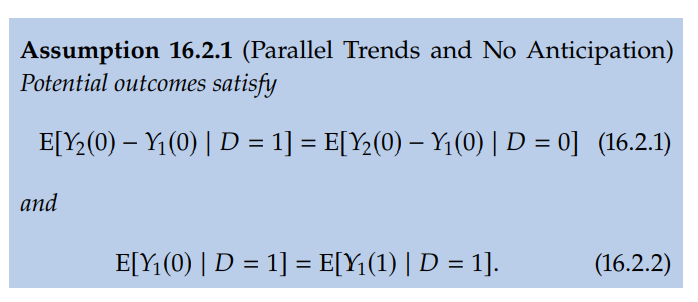

Condition (16.2.1) states that change in control potential outcomes is the same for both time periods.

Condition (16.2.2) states that receipt of treatment at $t=2$ does not impact average period 1 outcomes, eliminating _anticipation effects_.
- Anticipation effects (ChatGPT): ...changes in behavior by individuals or firms that occur in response to the expectation of a future event or policy change.

The book mentioned ATET: Avg Treatment Effects on the Treated...Oh because we want to know the effects of having a certain _treatment_

ATET can be formally defined as

$$\begin{aligned}
𝛼 &= E[𝑌_2(1) − 𝑌_2(0) | 𝐷 = 1]  \\
&= E[𝑌_2(1) | 𝐷 = 1] − E[𝑌_2(0) | 𝐷 = 1] \\
&= E[𝑌_2(1) | 𝐷 = 1]-(E[𝑌_1(1) | 𝐷 = 1] + E[𝑌_2(0) − 𝑌_1(0) | 𝐷 = 0]) \\
&= E[𝑌_2(1) − 𝑌_1(1) | 𝐷 = 1] − E[𝑌_2(0) − 𝑌_1(0) | 𝐷 = 0] \\
\end{aligned}$$

The exp in the last line is the difference between the difference between post and pre treatment period average outcomes ($E[𝑌_2(1) − 𝑌_1(1) | 𝐷 = 1]$) and pre-treatment period average outcomes in the control group ($E[𝑌_2(0) − 𝑌_1(0) | 𝐷 = 0]$), hence difference-in-differences.

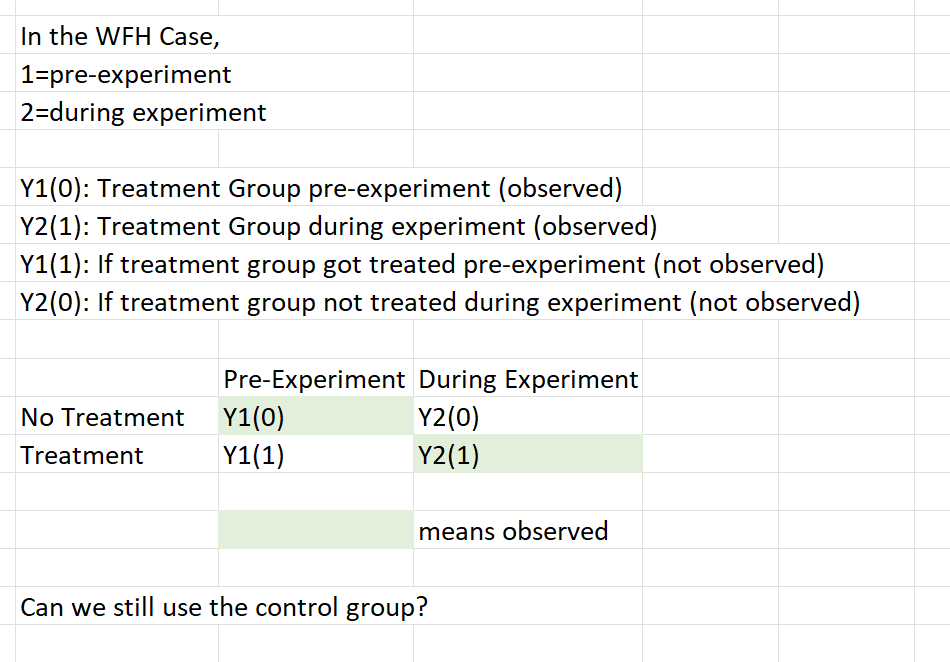

### DiD Method According to Gabor

The data we need for such comparisons is cross-section time series
(xt) panel data. We start with xt data with two time periods, in which subjects are observed twice.
We will consider what we can do when we have more observations per subject in the following
chapters.

DiD requires cross-section time series (xt) panel data

And, with observational data, the outcomes of the untreated subjects
don’t usually tell us what the outcomes of the treated would have been had they not been treated
(their potential untreated outcomes). Similarly, the observed outcomes of the treated subjects don’t
usually tell us what the outcomes of the untreated would have been had they been treated (their
potential treated outcomes).

The reason is endogenous sources of variation in x. The variables behind such endogenous variation
are the confounders. In principle, we could ensure that all variation in x is exogenous if we conditioned
on all confounders. But conditioning on all confounders is rarely possible in real life because typical
data doesn’t include all confounders. Instead, real-life data has observed variables that are imperfect
measures of only some of the confounders. However, if we found a variable that captured a lot of the
endogenous variation, we could get close to estimating the effect we are after.

- Taking account pre-intervention outcome:  If we condition
on the pre-intervention outcome, it amounts to comparing subjects that are similar in their potential
untreated outcomes, at least as measured before the intervention.

Let's say we want to identify the effect of flexible working hours to retention rates. To do this, we compared two companies:
- A: implemented flexible working hours
- B: usual working hours

If we compare A and B outright would give a biased estimate of the effect, because firms A and B are different. However, if we have retention rates from an earlier year before firm A introduced flexible working hours, we would have a baseline to compare, accounting to the differences.





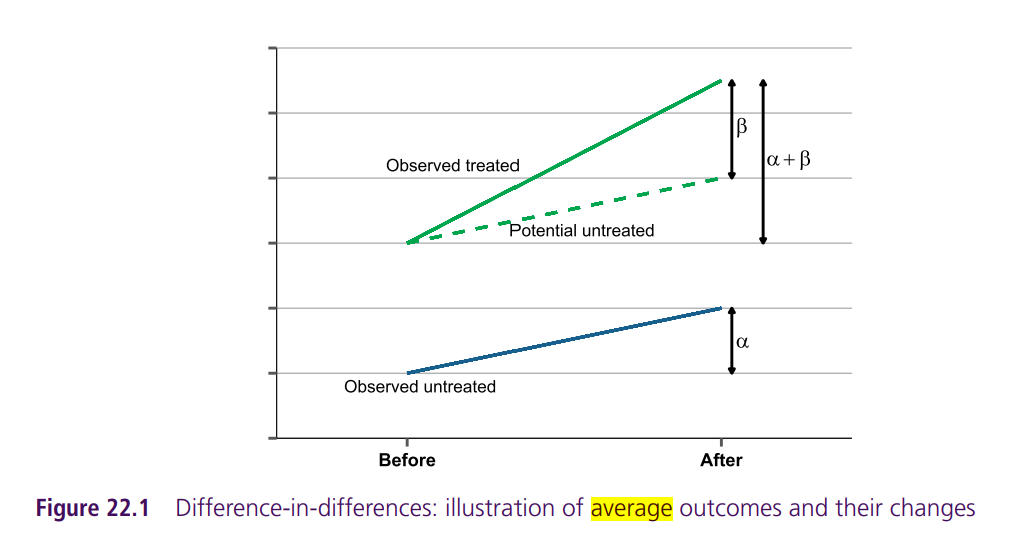

Essentially, DiD is comparing average changes of two groups, one serves as control and the other treatment.

DiD gives a good estimate of Average Treatment Effect on the Treated (ATET) with one condition:
1. **The untreated group's changes over time should serve as a valid proxy for the changes that the treated group would have experienced in the absence of the treatment.** This implies that the trends in the outcome variable for both groups should be similar before the treatment is applied.

For DiD to give a good estimate for ATE, the **treated group must also serves as a valid proxy for the untreated group if it is treated the same.**

The figure above shows how the changes are related to the coefficients of the regression. α is the
average change among untreated subjects; α + β is the average change among treated subjects; β is
the difference between the two.

Data of treatment and control must be balanced.

Weights could also be implemented in DiD.

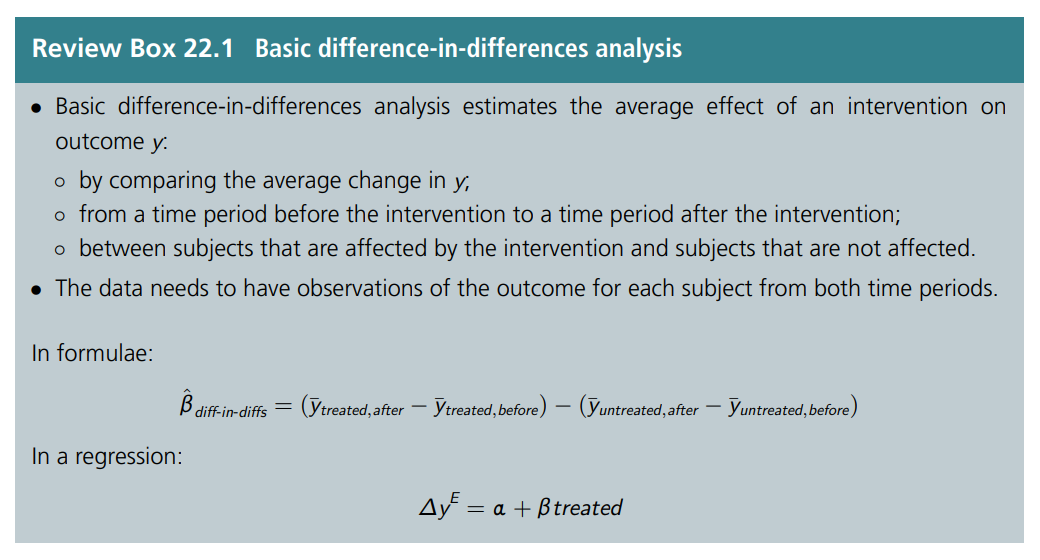

##### Parallel Trends Assumption

Without any intervention, these changes would be the same: the treands would be parallel.

In principle, we could add one more parallel trends assumption: that potential treated outcomes
would have changed the same, on average, among untreated subjects, as they did among treated
subjects.

We could verify by analyzing pre-intervention trends to get indirect evidence. Indirect evidence --> evidence that does not directly confirm or refute the parallel trends assumption but can still provide support for or against it by examining related patterns in the data.





In [ ]:
df_performance_experiment_cln.head()

,personid,year_week,expgroup,perform1,phonecall,phonecallraw,treatment,experiment_treatment,experiment_control,homethatweek,experiment_home,logphonecall,logcallpersec,logcalllength,logcall_dayworked,logdaysworked,wage_month,experiment_treatment_commute120,date,experiment_time
0,28560,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
1,26906,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.098612,201001.0,0.0,2010-01-01,0
2,31888,201001.0,0.0,-2.248854,-2.287922,109.0,0.0,0.0,0.0,0.0,0.0,4.691348,-5.144450,9.835797,9.835797,0.000000,201001.0,0.0,2010-01-01,0
3,16424,201001.0,0.0,-1.629726,-1.283035,252.0,0.0,0.0,0.0,0.0,0.0,5.529429,-5.027789,10.557218,9.458606,1.098612,201001.0,0.0,2010-01-01,0
4,6364,201001.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000,201001.0,0.0,2010-01-01,0


### Checking for Panel Imbalance

In [ ]:
df_performance_experiment_cln.groupby(['personid'])['perform1'].count()

personid
3906     64
4122     86
4448     83
4942     79
5018     48
         ..
44794    31
44800    60
45238    56
45254    58
45442    59
Name: perform1, Length: 249, dtype: int64

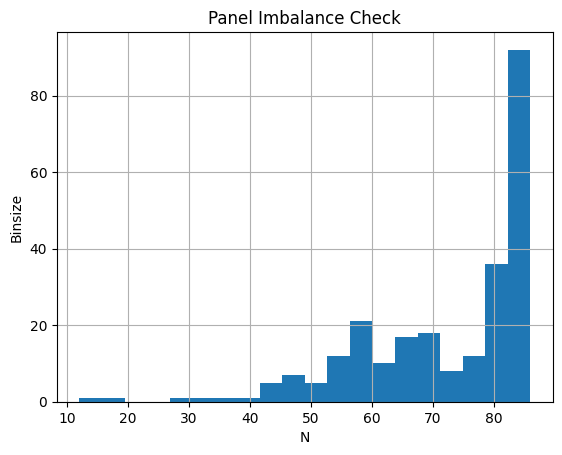

In [ ]:
df_performance_experiment_cln.groupby('personid')['perform1'].count().hist(bins=20)
plt.xlabel('N')
plt.ylabel('Binsize')
plt.title('Panel Imbalance Check')
plt.show()

### Checking for Parallel Trends

Checking whether trends for dependent variable (perform1) of control and treatment groups **pre-treatment** is the same.
- T-Test
- Observation of mean values

treatment
0.0    0.008310
1.0   -0.004612
Name: perform1, dtype: float32


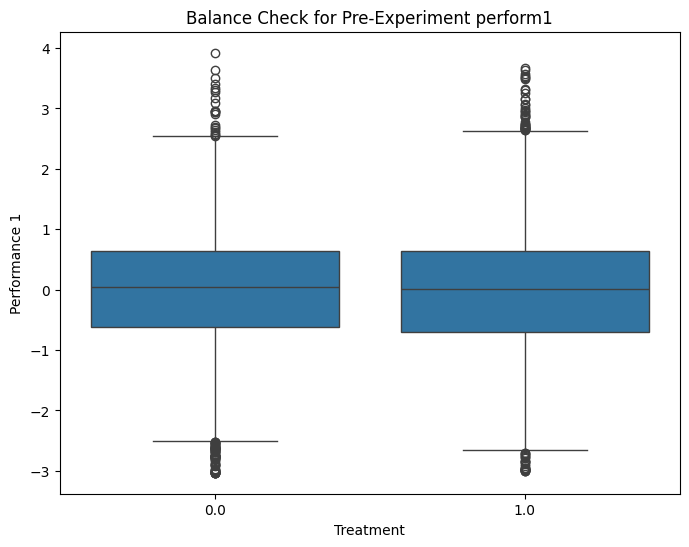

T-statistic: 0.6643025470278766
P-value: 0.5065111709773606
Fail to reject the null hypothesis: There is no significant difference in 'perform1' between treatment groups.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Check balance for 'perform1'
print(df_performance_experiment_cln[(df_performance_experiment_cln['experiment_time'] == 0)].groupby('treatment')['perform1'].mean())

# Visualize balance for 'perform1'
plt.figure(figsize=(8, 6))
sns.boxplot(x='treatment', y='perform1', data=df_performance_experiment_cln[(df_performance_experiment_cln['experiment_time'] == 0)])
plt.title('Balance Check for Pre-Experiment perform1')
plt.xlabel('Treatment')
plt.ylabel('Performance 1')
plt.show()

# Perform a t-test to statistically assess balance
from scipy import stats
group1 = df_performance_experiment_cln[(df_performance_experiment_cln['treatment'] == 0)&(df_performance_experiment_cln['experiment_time'] == 0)]['perform1'].dropna()
group2 = df_performance_experiment_cln[(df_performance_experiment_cln['treatment'] == 1)&(df_performance_experiment_cln['experiment_time'] == 0)]['perform1'].dropna()
t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'perform1' between treatment groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'perform1' between treatment groups.")



<ipython-input-108-8bec8344c537>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='date', y='perform1', hue='treatment', data=df_performance_experiment_cln, ci=None)


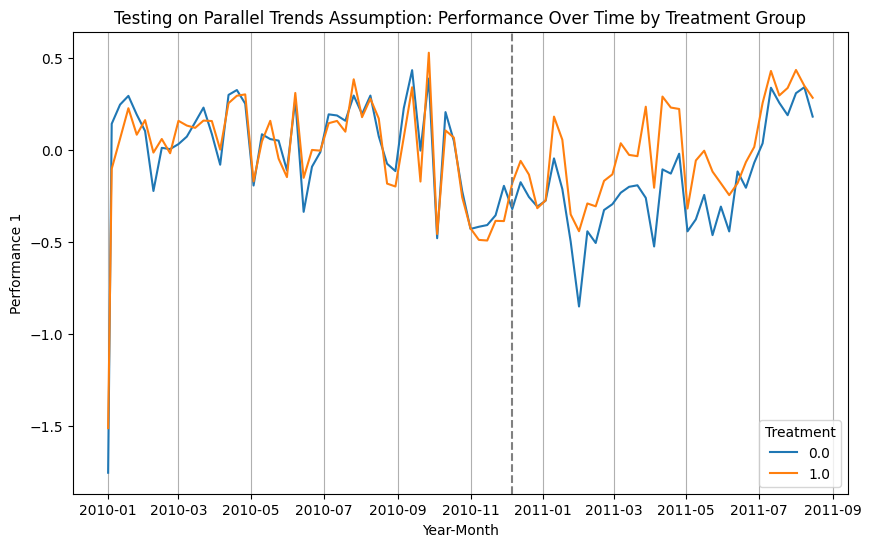

In [ ]:
import datetime
import matplotlib.pyplot as plt
# Assuming 'year_week' is a column in your DataFrame
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='perform1', hue='treatment', data=df_performance_experiment_cln, ci=None)
plt.axvline(x=datetime.datetime(2010, 12, 6), color='gray', linestyle='--')
plt.title('Testing on Parallel Trends Assumption: Performance Over Time by Treatment Group')
plt.xlabel('Year-Month')
plt.ylabel('Performance 1')
plt.legend(title='Treatment')

# Add major and minor gridlines for x-axis
plt.grid(True, which='major', axis='x')
plt.grid(True, which='minor', axis='x')

plt.show()


# Productivity Regressions


In [ ]:
#base_path = '/content/gdrive/MyDrive/Copy of work_from_home/' #### update path to read files from drive

#import pandas as pd

# Read datasets
#quit_data = pd.read_stata(base_path + 'raw/quit_data.dta')
#tc_comparison = pd.read_stata(base_path + 'raw/tc_comparison.dta')
#perf_during_exp = pd.read_stata(base_path + 'raw/performance_during_exper.dta')
#wfh_tidy_p = pd.read_csv(base_path + 'clean/wfh_tidy_person_p.csv')  #built on raw data

#print(wfh_tidy_p.head(3))
#print(tc_comparison.head(2))#

In [ ]:
#Interested in the 249 participants

# personids from tc_comparison
experiment_participants = tc_comparison['personid'].unique()

# filter perf_during_exp to include only the experiment participants
df_fe = perf_during_exp[perf_during_exp['personid'].isin(experiment_participants)]

# index reset
df_fe = df_fe.reset_index(drop=True)

# number of unique participants
print(f"Number of unique participants in df_fe: {df_fe['personid'].nunique()}")

#df_fe dataset for analysis

In [ ]:
csv_file_path =  'gdrive/MyDrive/df_fe.csv'
df_fe.to_csv(csv_file_path, index=False)

In [ ]:
## feature engineer for regression model
## Y is performance - Xs (experiment * time)

df_fe = df_fe.drop('experiment_nantong', axis = 1)

In [ ]:
# Create experiment period indicator
df_fe['experiment_period'] = (df_fe['date'] >= '2010-12-06') & (df_fe['date'] <= '2011-08-14')

# Create treatment*experiment interaction
df_fe['treat_exp_prod'] = df_fe['expgroup'] * df_fe['experiment_period'] #the interaction term is X from original equation

# Create week variable
df_fe['week'] = df_fe['date'].dt.to_period('W') #aggreagtion level in exp, time fixed effects, affect for seasonality

df_fe.info()

In [ ]:
import statsmodels.formula.api as smf

# Regression for log of minutes worked per week
model_minutes = smf.ols(
    formula='logdaysworked ~ treat_exp_prod + C(year_week) + C(personid)',
    data=df_fe
).fit()

print("Regression for log of minutes worked per week")
print(model_minutes.summary())

In [ ]:
# Regression for log of calls per minute
model_calls = smf.ols(
    formula='logcallpersec ~ treat_exp_prod + C(year_week) + C(personid)',
    data=df_fe
).fit()

print("Regression for log of calls per minute")
print(model_calls.summary())

In [ ]:

# coefficients and p-values for year_week dummies from the model for log of minutes worked per week
year_week_coefs_minutes = model_minutes.params.filter(like='C(year_week)')
year_week_pvalues_minutes = model_minutes.pvalues.filter(like='C(year_week)')

# coefficients and p-values for year_week dummies from the model for log of calls per minute
year_week_coefs_calls = model_calls.params.filter(like='C(year_week)')
year_week_pvalues_calls = model_calls.pvalues.filter(like='C(year_week)')

# averages for log of minutes worked per week
avg_coef_minutes = year_week_coefs_minutes.mean()
avg_pvalue_minutes = year_week_pvalues_minutes.mean()

# averages for log of calls per minute
avg_coef_calls = year_week_coefs_calls.mean()
avg_pvalue_calls = year_week_pvalues_calls.mean()

# result table
summary_table = pd.DataFrame({
    'Metric': ['R-squared', 'Adjusted R-squared', 'F-statistic', 'Prob (F-statistic)', 'Intercept (coef, p-value)', 'Avg Year_Week Coef (p-value)'],
    'Log of Minutes Worked per Week': [model_minutes.rsquared, model_minutes.rsquared_adj, model_minutes.fvalue, model_minutes.f_pvalue,
                                       (model_minutes.params['Intercept'], model_minutes.pvalues['Intercept']),
                                       (avg_coef_minutes, avg_pvalue_minutes)],
    'Log of Calls per Minute': [model_calls.rsquared, model_calls.rsquared_adj, model_calls.fvalue, model_calls.f_pvalue,
                                (model_calls.params['Intercept'], model_calls.pvalues['Intercept']),
                                (avg_coef_calls, avg_pvalue_calls)]
})

print(summary_table)

In [ ]:
import numpy as np

# Extract the coefficient for the treatment variable from the model for minutes worked per week
coef_minutes = model_minutes.params['treat_exp_prod']

# percent change
percentage_change = (np.exp(coef_minutes) - 1) * 100
print(f"Percentage change in minutes worked per week: {percentage_change:.2f}%")

coef_calls = model_calls.params['treat_exp_prod']
percentage_c2 = (np.exp(coef_calls) - 1) * 100
print(f"Percentage change in calls per minute: {percentage_c2:.2f}%")

# Attrition and Promotion

In [ ]:
quit_data = pd.read_stata('/quit_data.dta')
quit_data.info()

In [ ]:
import numpy as np
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm

In [ ]:
#changing categorical variables

quit_data['children'] = pd.Categorical(quit_data['children']).codes
for col in quit_data.columns:
    if quit_data[col].dtype == 'object':
        quit_data[col] = pd.to_numeric(quit_data[col], errors='coerce')



In [ ]:
#probit regression for dependent variable - Quit (yes/no)


# function to run probit and print results
def run_probit(X, y, model_name):
    probit_model = Probit(y, X).fit()
    print(f"\n{model_name} Results:")
    print(probit_model.summary())
    print("\nMarginal Effects:")
    print(probit_model.get_margeff().summary())

# data for full sample
X_full = quit_data[['expgroup', 'perform11', 'age', 'men', 'married', 'costofcommute']]
X_full['perform_treatment'] = X_full['perform11'] * X_full['expgroup']
X_full = sm.add_constant(X_full)
y_full = quit_data['quitjob']

#  probit for full sample
run_probit(X_full, y_full, "Full Sample")

# probit for control group
df_control = quit_data[quit_data['expgroup'] == 0]
X_control = df_control[['perform11', 'age', 'men', 'married', 'costofcommute']]
X_control = sm.add_constant(X_control)
y_control = df_control['quitjob']
run_probit(X_control, y_control, "Control Group")

# probit for treatment group
df_treatment = quit_data[quit_data['expgroup'] == 1]
X_treatment = df_treatment[['perform11', 'age', 'men', 'married', 'costofcommute']]
X_treatment = sm.add_constant(X_treatment)
y_treatment = df_treatment['quitjob']
run_probit(X_treatment, y_treatment, "Treatment Group")

In [ ]:
promo_df = pd.read_stata('/promotion.dta')
print(promo_df.head(3))
promo_df.info()

In [ ]:
#promotion and wfh

#  interaction term
promo_df['perform11_treatment'] = promo_df['perform11'] * promo_df['expgroup']

# data for the full model with interaction
X = promo_df[['expgroup', 'perform11', 'perform11_treatment', 'men', 'tenure', 'high_school']]
X = sm.add_constant(X)  # Add a constant term for the intercept
y = promo_df['promote_switch']

#  probit model #promoted within a sepcific time period - yes/no
probit_model = Probit(y, X).fit()

print("\nFull Model with Interaction Results:")
print(probit_model.summary())

# marginal effects
margeff = probit_model.get_margeff()
print("\nMarginal Effects:")
print(margeff.summary())